In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from dataset_class.EDA import EDA

I will be attempting an Exploratory Data Analysis of the lending-club dataset. Specifically, I will be focusing on identifying key variables that might predict the default rate so that in the future, a model may be built on this work. Since we're trying build a model to predict default rates based on data, I will primarily only look at the accepted loan data.

First, we need to load the dataset into the EDA class which will handle the cleaning and graphing for us. Let's take a preliminary look at the data

In [2]:
data = EDA("accepted_2007_to_2018Q4.csv","rejected_2007_to_2018Q4.csv")
data.data_info()

C:\Users\jaipa\miniconda3\envs\zest\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


That takes up a lot of space! There's 151 columns and 2 million entries, and that's just in the accepted data set. Let's clean this up by removing columns that are not relevent to default analysis like 'title', as well as columns that have over 10% of their data missing. We'll also remove rows that are missing key values in 'emp_length' and 'revol_util' that we assume might have a significant impact on creditworthiness from the get-go. From this final dataframe, we'll restrict ourselves to the first 23 columns, as we have a limited amount of time and space for this analysis.

In [3]:
data.raw_clean_up()
data.data_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112110 entries, 0 to 2260698
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   loan_amnt            float64
 1   funded_amnt_inv      float64
 2   term                 object 
 3   int_rate             float64
 4   installment          float64
 5   grade                object 
 6   sub_grade            object 
 7   emp_length           object 
 8   home_ownership       object 
 9   annual_inc           float64
 10  verification_status  object 
 11  issue_d              object 
 12  loan_status          object 
 13  purpose              object 
 14  dti                  float64
 15  earliest_cr_line     object 
 16  fico_range_low       float64
 17  fico_range_high      float64
 18  inq_last_6mths       float64
 19  open_acc             float64
 20  pub_rec              float64
 21  revol_util           float64
 22  total_acc            float64
dtypes: float64(13), object(10)
memor

Let's look at the overall data. What is the status of accepted loans?

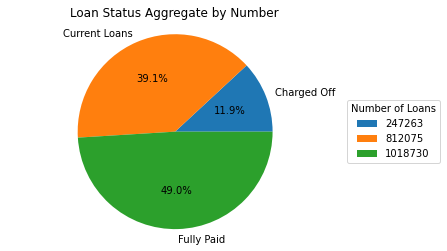

In [4]:
data.loan_defaults()

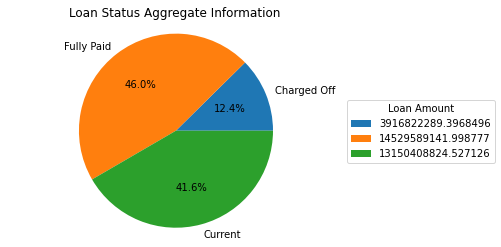

In [5]:
data.loan_defaults_by_amount()

It looks like by numbers or by amount, a large percentage of loans are still ongoing, and so we have to exclude them from the analysis. Also, fully paid loans are fewer in number, but have a higher share of the tital value of loans despite the charged off loans being similar. This might be because the model used by the lending club on average gives larger loans to people more likely to pay them back in full and could be worth investigating. 

Let's get the expected default rate in the sample, and compare different variables to see if they're related to it. But first, we need to cleanup the data even further by removing outliers, moving some values into bins, and reformatting/splitting some fields.

In [6]:
data.refined_clean_up()

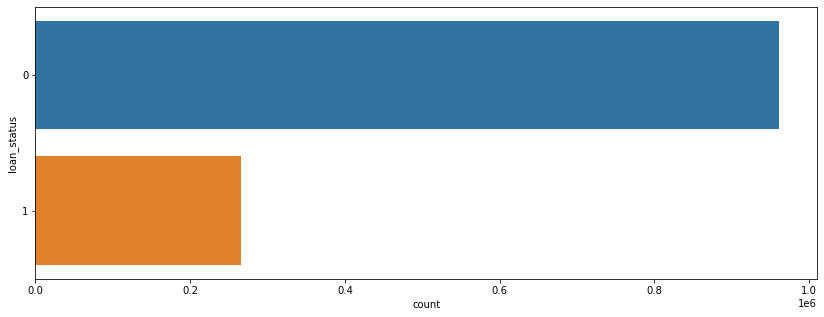

In [8]:
plt.figure(figsize=(14,5))
sns.countplot(y="loan_status", data=data.acc_df)
plt.show()

The above plot shows that the expected default rate in the sample is around 26.5%. 

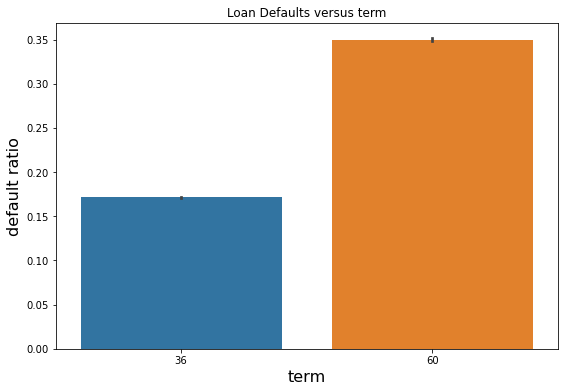

In [9]:
data.bar("term",figsize=(9,6))

The previous plot shows that the default rate appears to increase with the term. This seems intuitive as people that take out short term loans would be more likely to have a plan to pay it back. Thus term is related to the default rate.

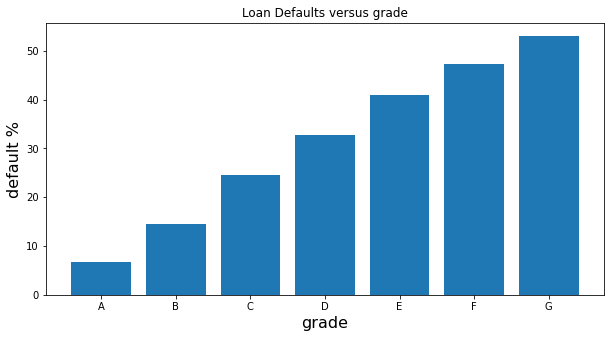

In [10]:
data.ratio("grade")

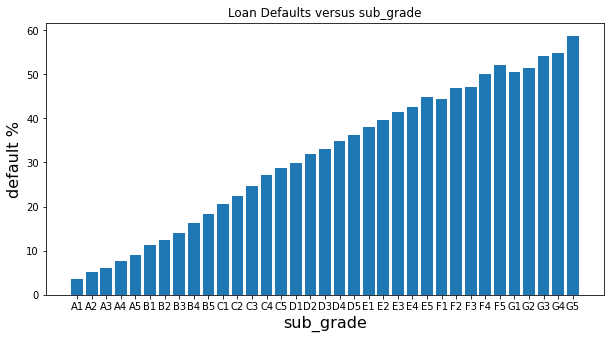

In [11]:
data.ratio("sub_grade")

From the previous two plots, there is a clear linear relationship between the grade/subgrade and the default rate on the loan. This is unsurprising as the grade is a measure of the riskiness of the loan, but it lets us know that it is a reliable metric for this dataset.

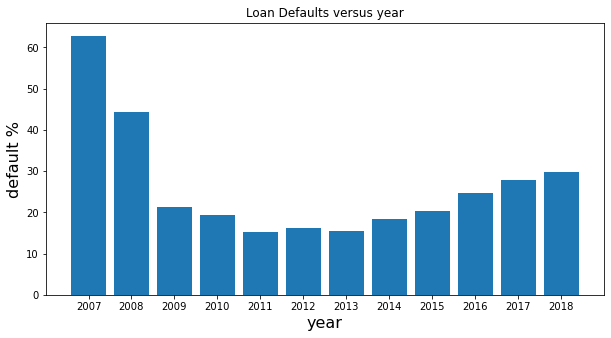

In [12]:
data.ratio("year")

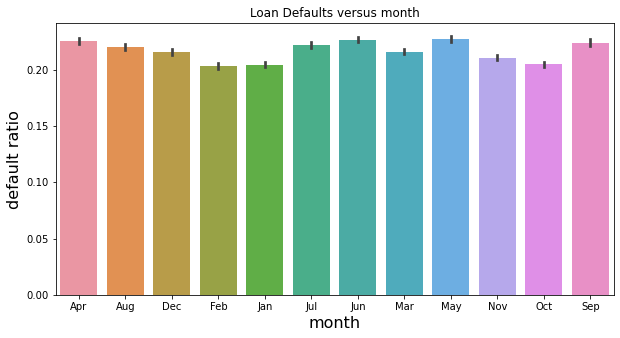

In [13]:
data.bar("month")

There appears to be no correlation between the month and defaults. However, other the outlier years of 2007 and 2008 due to the financial crisis, there appears to be a rising number of defaults in recent years with linear correlation.

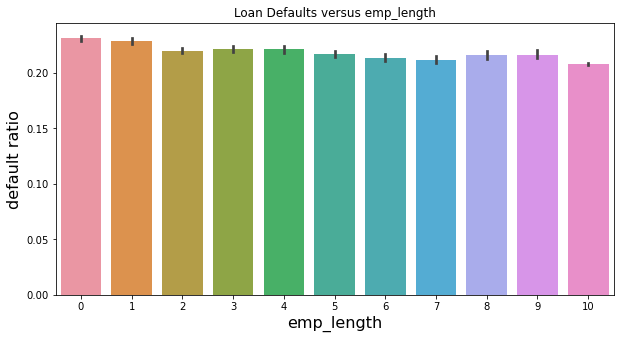

In [14]:
data.bar("emp_length")

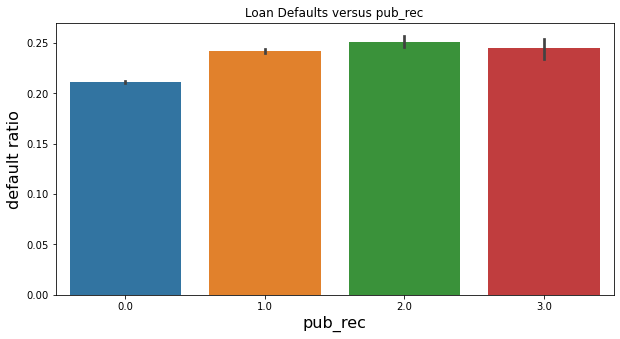

In [15]:
data.bar("pub_rec")

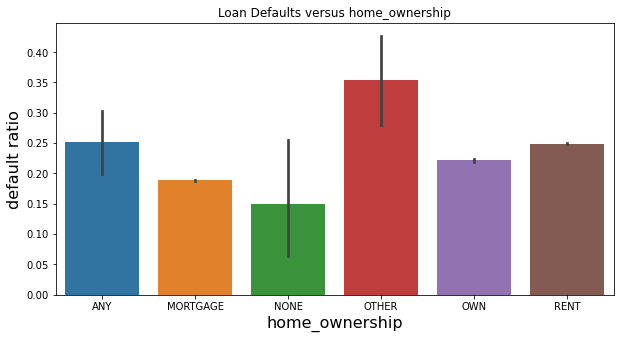

In [16]:
data.bar("home_ownership")

It appears that there is no significant relationship between one's public record, their home ownership status, the length of their last employment and their likelihood of defaulting. There is variance in the homeownership status data, but it is unclear if it is due to improper record-keeping or if there is a greater pattern. But based on the current information, there is no clear pattern.

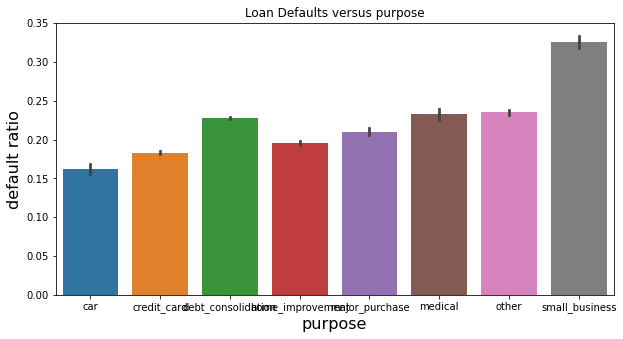

In [17]:
data.bar("purpose")

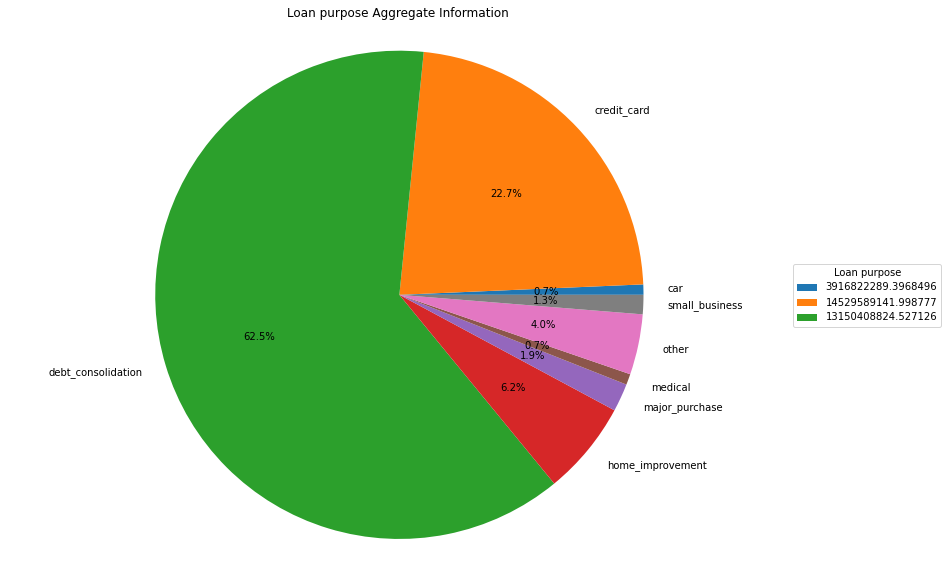

In [26]:
data.loan_purpose()

Loans for small business are the standout here with around a 33% default- the other categories show normal variance. This could be the result of sample size however, given the earlier pie chart breakdown showing fewer loans approved for small businesses.

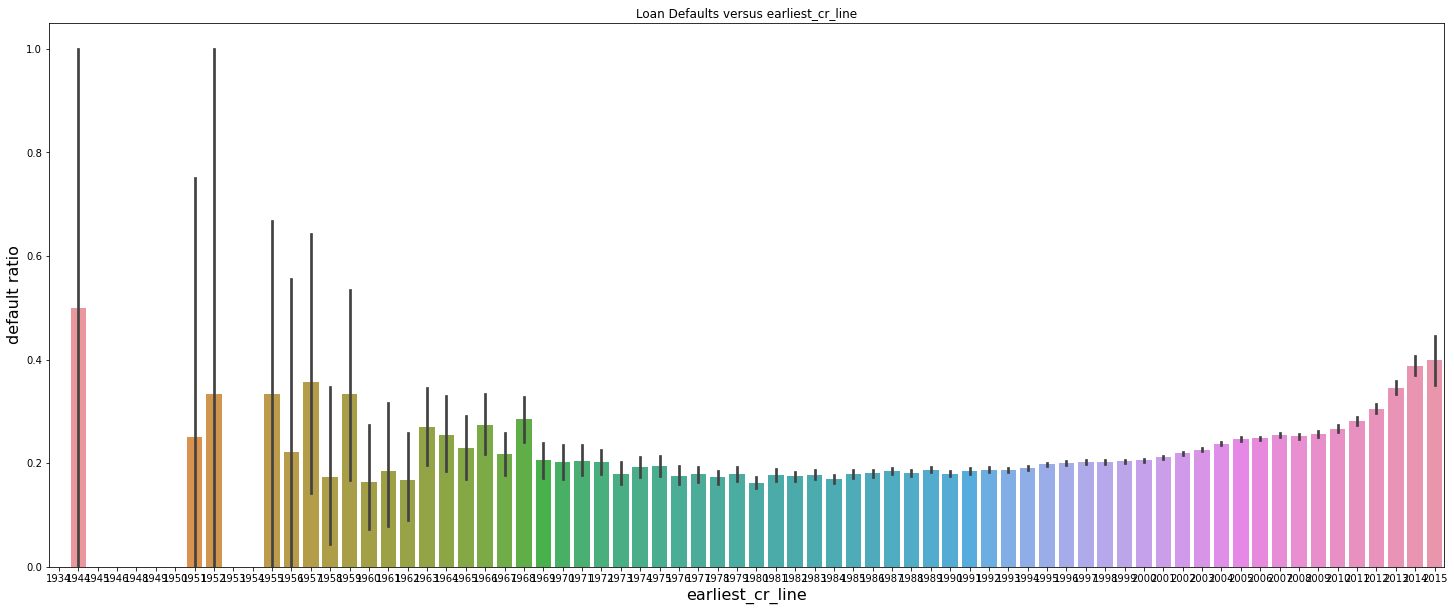

In [18]:
data.bar("earliest_cr_line",figsize=(25,10))

Older data has less continuity and more error, but more recently, there is a positive correlation with year credit was received and default rate.

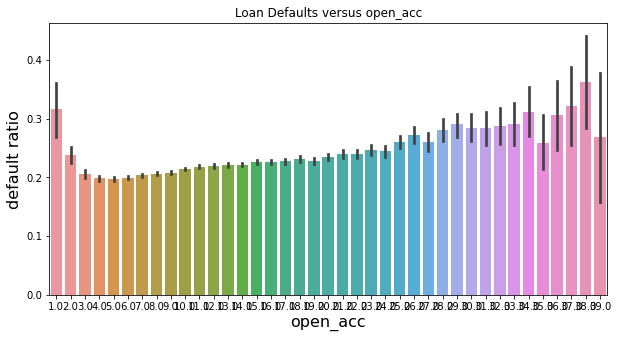

In [19]:
data.bar("open_acc")

There appears to be a slight positive correlation between defaults and the number of open accounts but there are also outliers in this trend.

c:\Users\jaipa\CS\apps\zest_eda\dataset_class\EDA.py:156: RuntimeWarning: invalid value encountered in long_scalars
  values.append(count*100/filter["loan_status"].count())


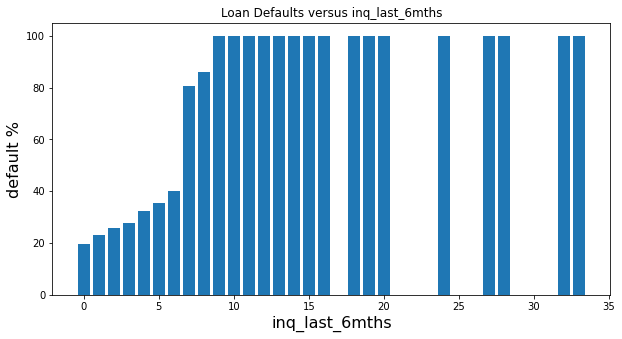

In [20]:
data.ratio("inq_last_6mths")

This appears to be a very strong indicator of default rates, with all values over 10 having a 100% default rate, and a positive correlation for values under 10. This makes sense, as it draws on other people's perception of someone's credit, with people usually checking someone if they believe them to have a poor rating.

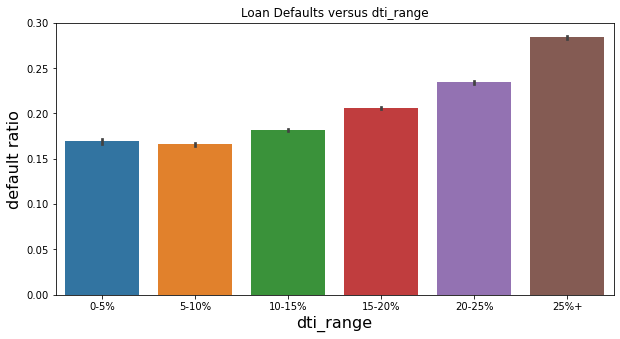

In [21]:
data.bar("dti_range")

There is a clear relationship here - the higher the debt to income ratio, the more likely one is to default. This is intuitive, as more debt makes it harder to pay off loans.

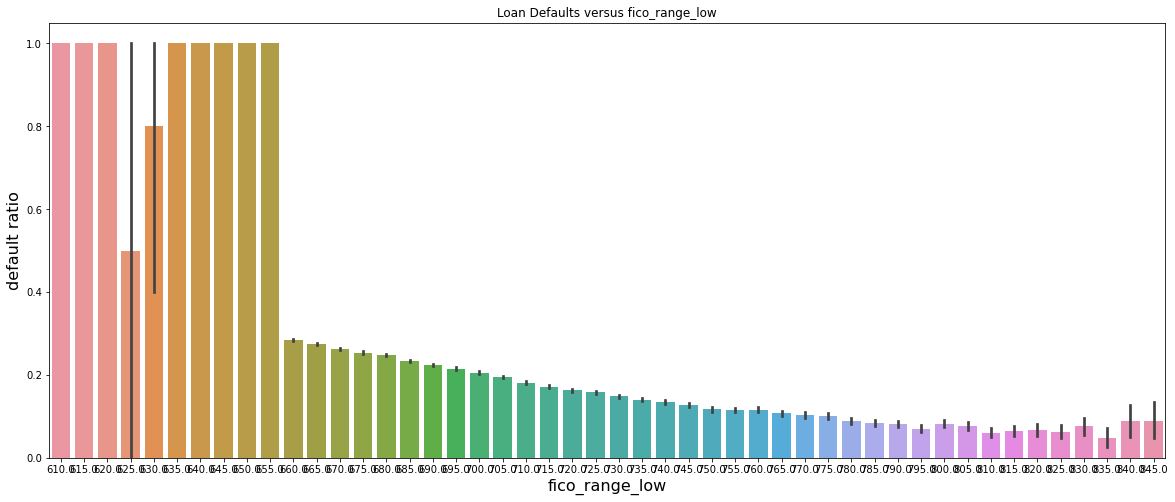

In [22]:
data.bar("fico_range_low",figsize=(20,8))

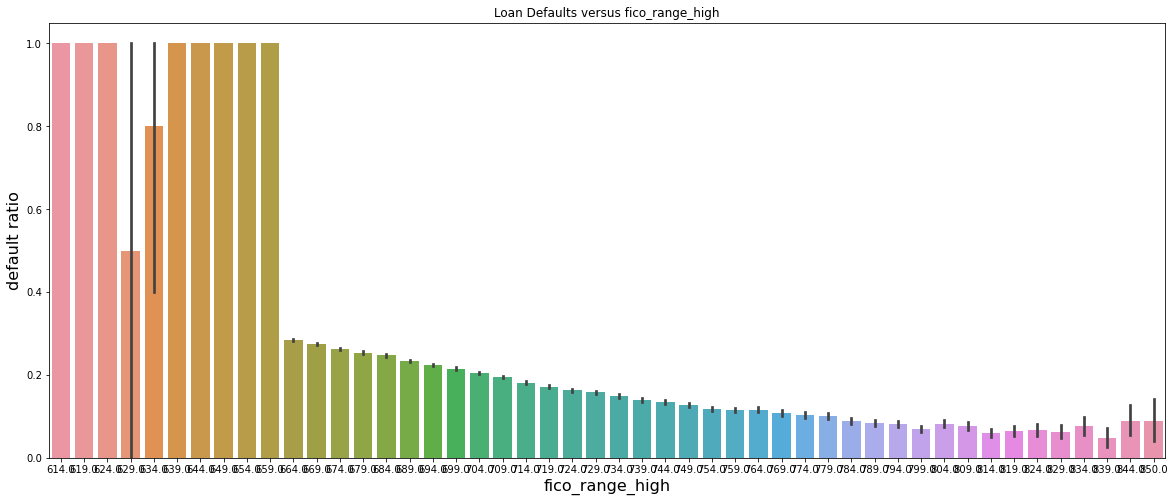

In [23]:
data.bar("fico_range_high",figsize=(20,8))

Both FICO ranges appear to be good predictors of defaults. For lower values, the default rate is consistently close to 100%, with a relatively steady decline as the rating increases. However, since both the graphs mirror each other, it is unclear if this shows the true range of any borrower's credit range, and that might be worth investigating further.

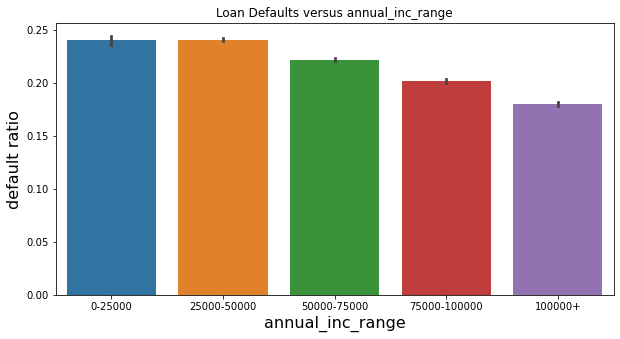

In [24]:
data.bar("annual_inc_range")

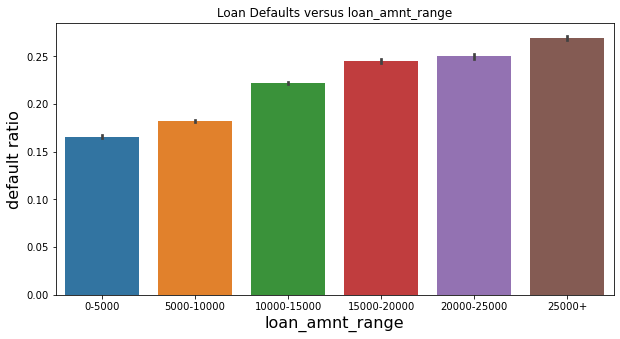

In [25]:
data.bar("loan_amnt_range")

Annual income range and loan amount range both have correlations albeit in opposite directions. As the loan amount increases, so do defaults. This makes sense - larger loans are harder to pay back. As income range increases, the default rate decreases, probably because it becomes easier to payback loans with larger income.

In conclusion, of the variables that might be useful predictors of defaults for the lending club dataset, the FICO ratings and the number of inquires in the last 6 months are the strongest with certain ranges correlating with almost 100% default rates and so is the grade of loan with a very clear linear correlation. The loan amount, the income of the borrower, their debt-to-income ratio, the year the loan was taken out and the year they established a line of credit are all lesser, but valid predictors of defaulting.